# Extensions to Linear Models - Lab

## Introduction

In this lab, you'll practice many concepts learned in this section, from adding interactions and polynomials to your model to AIC and BIC!

## Summary

You will be able to:
- Build a linear regression model with polynomial features/interactions
- Perform regularization
- Use AIC and BIC to select the best value for the regularization parameter


## Let's get started!

Import all the necessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from sklearn.datasets import load_boston

## Look at a Baseline Boston Housing Data Model

Import the Boston housing data set, use all the predictors in their scaled version (using `preprocessing.scale`. Look at a baseline model using *scaled variables* as predictors. Use 5-fold cross-validation this time and use the $R^2$ score to evaluate the model.

In [47]:
# importing the data
boston = load_boston()
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
y = pd.DataFrame(data=boston.target, columns=['MEDV'])

In [48]:
# scaling the data
X_scaled = pd.DataFrame(preprocessing.scale(X), columns = X.columns)
all_data = pd.concat([y,X_scaled], axis = 1)
all_data.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,21.6,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,34.7,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,33.4,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,36.2,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [39]:
# # define a function to automate running a model
# def run_model(model, X_train, X_test, y_train, y_test):
#     print('Training R^2 :', model.score(X_train, y_train))
#     y_pred_train = model.predict(X_train)
#     print('Training Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
#     print('----------------')
#     print('Testing R^2 :', model.score(X_test, y_test))
#     y_pred_test = model.predict(X_test)
#     print('Testing Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),'\n')

In [40]:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=20,test_size=0.2)
# linreg = LinearRegression()
# linreg.fit(X_train, y_train)
# run_model(linreg, X_train, X_test, y_train, y_test)

In [41]:
# Look at the R^2 score for the baseline model with 5-fold cross validation
linreg = LinearRegression()
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(linreg, X_scaled, y, scoring="r2", cv=crossvalidation))
print("Baseline model R^2:", baseline)

Baseline model R^2: 0.7176778617934925


## Include interactions

Look at all the possible combinations of variables for interactions by adding interactions one by one to the baseline model. Next, evaluate that model using 5-fold classification and store the $R^2$ to compare it with the baseline model.

You've created code for this before in the interactions lab, yet this time, you have scaled the variables so the outcomes may look different. 

Print the 7 most important interactions.

In [42]:
from itertools import combinations
combinations = list(combinations(boston.feature_names, 2))

X_interact = X_scaled.copy()
r_scores = []
for combo in combinations:
    X_interact['interaction'] = X_scaled[combo[0]] * X_scaled[combo[1]]
    temp_r2 = np.mean(cross_val_score(linreg, X_interact, y, scoring="r2", cv=crossvalidation))
    if temp_r2 > baseline:
        r_scores.append((combo[0], combo[1], round(temp_r2,4)))

r_scores.sort(key=lambda row: row[-1], reverse=True)  # sorts in place
r_scores[:7]

[('RM', 'LSTAT', 0.7832),
 ('RM', 'TAX', 0.7753),
 ('RM', 'RAD', 0.7701),
 ('RM', 'PTRATIO', 0.7636),
 ('INDUS', 'RM', 0.7566),
 ('NOX', 'RM', 0.7461),
 ('RM', 'AGE', 0.7421)]

Write code to include the 7 most important interactions in your data set by adding 7 columns. Name the columns "var1_var2" with var1 and var2 the two variables in the interaction.

In [53]:
df_inter = X_scaled.copy()
for combo in r_scores[:7]:
    df_inter[f'{combo[0]}_{combo[1]}'] = X_scaled[combo[0]] * X_scaled[combo[1]]
new_baseline = np.mean(cross_val_score(linreg, df_inter, y, scoring="r2", cv=crossvalidation))
print("Interactions baseline R^2:", new_baseline)
df_inter.head()

Interactions baseline R^2: 0.7897850685984782


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RM_LSTAT,RM_TAX,RM_RAD,RM_PTRATIO,INDUS_RM,NOX_RM,RM_AGE
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,-0.444930,-0.275757,-0.406574,-0.603547,-0.532772,-0.059659,-0.049646
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.095668,-0.191813,-0.168607,-0.058883,-0.115279,-0.143814,0.071331
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,-1.550451,-1.266461,-1.113245,-0.388783,-0.761138,-0.949544,-0.340960
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,-1.383713,-1.124148,-0.765197,0.114875,-1.328183,-0.848901,-0.823092
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,-1.261136,-1.358947,-0.925023,0.138869,-1.605599,-1.026210,-0.628023


## Include Polynomials

Try polynomials of 2, 3 and 4 for each variable, in a similar way you did for interactions (by looking at your baseline model and seeing how $R^2$ increases). Do understand that when going for a polynomial of 4, the particular column is raised to the power of 2 and 3 as well in other terms. We only want to include "pure" polynomials, so make sure no interactions are included. We want the result to return a list that contain tuples of the form:

`(var_name, degree, R2)`, so eg. `('DIS', 3, 0.732)`

In [55]:
from sklearn.preprocessing import PolynomialFeatures
polynomials = []
for col in X.columns:
    for degree in [2,3,4]:
        data = X_scaled.copy()
        poly = PolynomialFeatures(degree, include_bias=False)
        
        ### why are we doing the next line to UN-scaled data???
        X_poly = poly.fit_transform(X[[col]])    # "X" is the unscaled dataframe of the features
        ### I don't understand!!
        
        data = pd.concat([data.drop(col, axis=1),pd.DataFrame(X_poly)], axis = 1)
        score = np.mean(cross_val_score(linreg, data, y, scoring="r2", cv=crossvalidation))
        if score > baseline: polynomials.append((col, degree, round(score,4)))
print("Top 10 polynomials: %s" %sorted(polynomials, key=lambda poly: poly[2], reverse=True)[:10])

Top 10 polynomials: [('RM', 4, 0.8004), ('RM', 2, 0.7823), ('LSTAT', 4, 0.782), ('RM', 3, 0.7807), ('LSTAT', 3, 0.774), ('LSTAT', 2, 0.7718), ('DIS', 3, 0.7366), ('DIS', 2, 0.732), ('DIS', 4, 0.7308), ('TAX', 4, 0.724)]


For each variable, print out the maximum R2 possible when including Polynomials.

In [56]:
polynom = pd.DataFrame(polynomials)
polynom.groupby([0], sort=False)[2].max()

0
ZN         0.7232
INDUS      0.7233
NOX        0.7205
RM         0.8004
AGE        0.7222
DIS        0.7366
RAD        0.7195
TAX        0.7240
PTRATIO    0.7209
B          0.7197
LSTAT      0.7820
Name: 2, dtype: float64

Which two variables seem to benefit most from adding Polynomial terms?

Add Polynomials for the two features that seem to benefit the most, as in have the best R squared compared to the baseline model. For each of the two feature, raise to the Polynomial that generates the best result. Make sure to start from the data set `df_inter` so the final data set has both interactions and polynomials in the model.

In [70]:
for col in ['RM','LSTAT']:
    poly = PolynomialFeatures(4, include_bias=False)
    X_poly = poly.fit_transform(X[[col]])
    col_names = [col, col+'_2', col+'_3', col+'_4']
    df_inter = pd.concat([df_inter.drop(col, axis=1), pd.DataFrame(X_poly, columns=col_names)], axis=1)
df_inter.head()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,...,NOX_RM,RM_AGE,RM,RM_2,RM_3,RM_4,LSTAT,LSTAT_2,LSTAT_3,LSTAT_4
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,...,-0.059659,-0.049646,6.575,43.230625,284.241359,1868.886938,4.98,24.8004,123.505992,615.059840
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.367166,0.557160,-0.867883,-0.987329,-0.303094,...,-0.143814,0.071331,6.421,41.229241,264.732956,1699.850313,9.14,83.5396,763.551944,6978.864768
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,...,-0.949544,-0.340960,7.185,51.624225,370.920057,2665.060607,4.03,16.2409,65.450827,263.766833
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,-0.809889,1.077737,-0.752922,-1.106115,0.113032,...,-0.848901,-0.823092,6.998,48.972004,342.706084,2398.257176,2.94,8.6436,25.412184,74.711821
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,-0.511180,1.077737,-0.752922,-1.106115,0.113032,...,-1.026210,-0.628023,7.147,51.079609,365.065966,2609.126456,5.33,28.4089,151.419437,807.065599


## Full model R-squared

Check out the R-squared of the full model.

In [72]:
full_model_r2 = np.mean(cross_val_score(linreg, df_inter, y, scoring="r2", cv=crossvalidation))
print("Full Model R^2:", full_model_r2)

Full Model R^2: 0.8061549447222885


## Finding the best Lasso regularization parameter

You've learned that, when using Lasso regularization, your coefficients shrink to 0 when using a higher regularization parameter. Now the question is which value we should choose for the regularization parameter. 

This is where the AIC and BIC come in handy! We'll use both criteria in what follows and perform cross-validation to select an optimal value of the regularization parameter alpha of the Lasso estimator.

Read the page here: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html and create a similar plot as the first one listed on the page. 

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

def plot_ic_criterion(model, name, color):
    # This is to avoid division by zero while doing np.log10
    EPSILON = 1e-4
    
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label=f'{name}')
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label=f'alpha for {name} = {np.round(-np.log10(alpha_),4)}')
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

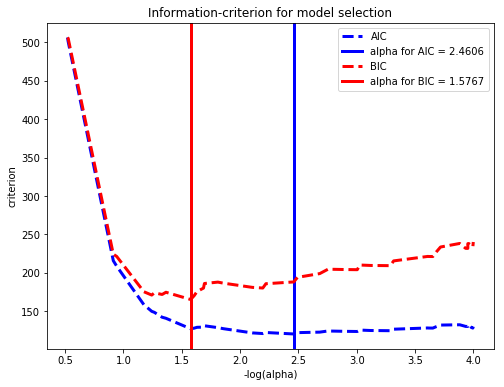

In [82]:
rng = np.random.RandomState(42)

model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(df_inter, y)
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(df_inter, y)
alpha_aic_ = model_aic.alpha_

# plot the outcome
plt.figure(figsize=(8,6))
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection');

## Analyze the final result

Finally, use the best value for regularization parameter according to AIC and BIC and compare the R squared parameters and MSE using train-test-split. Compare with the baseline model.

In [97]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

def run_model(model, X_train, X_test, y_train, y_test):
    print('Training r^2:\t', model.score(X_train, y_train))
    print('Testing r^2:\t', model.score(X_test, y_test))
    print('Training MSE:\t', mean_squared_error(y_train, model.predict(X_train)))
    print('Testing MSE:\t', mean_squared_error(y_test, model.predict(X_test)))

In [98]:
# Code for baseline model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=20,test_size=0.2)
linreg.fit(X_train, y_train)
run_model(linreg, X_train, X_test, y_train, y_test)

Training r^2:	 0.7360198858245186
Testing r^2:	 0.7438826183113534
Training MSE:	 23.549231544740437
Testing MSE:	 16.495351975931673


In [99]:
# code for lasso with alpha from AIC
X_train, X_test, y_train, y_test = train_test_split(df_inter, y, random_state=20,test_size=0.2)
lasso = Lasso(alpha=model_aic.alpha_)
lasso.fit(X_train, y_train)
run_model(lasso, X_train, X_test, y_train, y_test)

Training r^2:	 0.8423780805383727
Testing r^2:	 0.759675712460213
Training MSE:	 14.061192031536182
Testing MSE:	 15.478190840452134


In [100]:
# code for lasso with alpha from BIC
X_train, X_test, y_train, y_test = train_test_split(df_inter, y, random_state=20,test_size=0.2)
lasso = Lasso(alpha=model_bic.alpha_)
lasso.fit(X_train, y_train)
run_model(lasso, X_train, X_test, y_train, y_test)

Training r^2:	 0.8417445310656567
Testing r^2:	 0.7578507364043174
Training MSE:	 14.11770993734373
Testing MSE:	 15.595729221452155


## Level Up - Optional

### Create a Lasso Path

From this section, you know that when using lasso, more parameters shrink to zero as your regularization parameter goes up. In Scikit-Learn there is a function lasso_path which visualizes the shrinkage of the coefficients while alpha changes. Try this out yourself!

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py

### AIC and BIC for subset selection
This notebook shows how you can use AIC and BIC purely for feature selection. Try this code out on our Boston Housing data!

https://xavierbourretsicotte.github.io/subset_selection.html

## Summary

Congratulations! You now know how to create better linear models and how to use AIC and BIC for both feature selection and to optimize your regularization parameter when performing Ridge and Lasso. 